In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
xls = pd.ExcelFile('C:/Users/farma/Desktop/KPMG_virtual_internship/KPMG_VI_New_raw_data_update_final.xlsx')

# Data Cleaning

In [3]:
# Transcation Data
df_tr = pd.read_excel(xls,'Transactions',skiprows=1)
df_tr.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226


In [4]:
df_tr.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [5]:
df_tr = df_tr[df_tr['brand'].notnull()]
df_tr.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               358
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date      0
dtype: int64

In [6]:
df_tr['online_order'].fillna('n/a',inplace = True)
df_tr.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [7]:
df_tr.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226


In [8]:
# New customer list data
df_cl = pd.read_excel(xls,'NewCustomerList',skiprows=1)
df_cl.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Column1,Column2,Column3,Column4,Column5,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.02,1.275,1.59375,1.354688,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.82,0.820,1.02500,0.871250,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.70,0.700,0.70000,0.700000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.80,1.000,1.00000,1.000000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.97,0.970,1.21250,1.212500,4,4,1.703125


In [9]:
df_cl.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Column1                                  0
Column2                                  0
Column3                                  0
Column4                                  0
Column5                                  0
Rank                                     0
Value                                    0
dtype: int6

In [10]:
import datetime

df_cl['DOB'] = pd.to_datetime(df_cl['DOB'])
now = pd.Timestamp('now')
df_cl['age'] = ((now - df_cl['DOB'])/365).dt.days
df_cl.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Column1,Column2,Column3,Column4,Column5,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,1.02,1.275,1.59375,1.354688,1,1,1.718750,62.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.82,0.820,1.02500,0.871250,1,1,1.718750,50.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.70,0.700,0.70000,0.700000,1,1,1.718750,45.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.80,1.000,1.00000,1.000000,4,4,1.703125,41.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.97,0.970,1.21250,1.212500,4,4,1.703125,54.0


In [11]:
df_cl.drop(['DOB','Column1','Column2','Column3','Column4','Column5'],axis=1,inplace=True)
df_cl.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,Male,86,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,62.0
1,Morly,Genery,Male,69,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,50.0
2,Ardelis,Forrester,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,45.0
3,Lucine,Stutt,Female,64,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,41.0
4,Melinda,Hadlee,Female,34,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,54.0


In [12]:
# Customer Demographics Data
df_cd = pd.read_excel(xls,'CustomerDemographic',skiprows=1)
df_cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [13]:
df_cd.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [14]:
import datetime

df_cd['DOB'] = pd.to_datetime(df_cd['DOB'])
now = pd.Timestamp('now')
df_cd['age'] = ((now - df_cd['DOB'])/365).dt.days
df_cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,66.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,39.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,66.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,58.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,43.0


In [15]:
df_cd = df_cd[df_cd['age'] < 90]
df_cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,66.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,39.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,66.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,58.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,43.0


In [16]:
df_cd['gender'] = df_cd['gender'].replace('Female','F')
df_cd['gender'] = df_cd['gender'].replace('Male','M')
df_cd['gender'] = df_cd['gender'].replace('Femal','F')
df_cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,66.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,39.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,66.0
3,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,58.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,43.0


In [17]:
df_cd['tenure'].fillna(df_cd['tenure'].median(),inplace=True)
df_cd.drop(['DOB','default'],axis=1,inplace=True)
df_cd.isna().sum()

customer_id                              0
first_name                               0
last_name                              121
gender                                   0
past_3_years_bike_related_purchases      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
age                                      0
dtype: int64

In [18]:
df_cd.fillna('n/a',inplace=True)
df_cd.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
age                                    0
dtype: int64

In [19]:
# Customer Address Data
df_ca = pd.read_excel(xls,'CustomerAddress',skiprows=1)
df_ca.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [20]:
df_ca['state'] = df_ca['state'].replace('New South Wales','NSW')
df_ca['state'] = df_ca['state'].replace('Victoria','VIC')
df_ca.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


# Data Transformation

In [23]:
df_cl['age'].fillna(df_cl['age'].median(),inplace = True)
df_cl.fillna('n/a',inplace = True)
df_cl.isna().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
age                                    0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cl[['gender','job_title','job_industry_category','wealth_segment','owns_car','state']] = df_cl[['gender','job_title','job_industry_category','wealth_segment','owns_car','state']].apply(lambda col: le.fit_transform(col))
df_cl.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,1,86,71,5,2,N,1,14,45 Shopko Center,4500,1,Australia,6,1,1.718750,62.0
1,Morly,Genery,1,69,165,6,2,N,0,16,14 Mccormick Park,2113,0,Australia,11,1,1.718750,50.0
2,Ardelis,Forrester,0,10,139,2,0,N,0,10,5 Colorado Crossing,3505,2,Australia,5,1,1.718750,45.0
3,Lucine,Stutt,0,64,4,5,0,N,1,5,207 Annamark Plaza,4814,1,Australia,1,4,1.703125,41.0
4,Melinda,Hadlee,0,34,68,2,0,N,0,19,115 Montana Place,2093,0,Australia,9,4,1.703125,54.0


In [25]:
df_cl.drop(['deceased_indicator','address','country','Rank','Value'],axis='columns',inplace = True)
df_cl.to_csv('new_cl_proc.csv',index = False)

In [26]:
df_cust = pd.merge(df_cd,df_ca, on='customer_id',how='inner')
df_cust.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,M,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,n/a,M,33,n/a,IT,Mass Customer,N,No,7.0,58.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,F,56,Senior Editor,n/a,Affluent Customer,N,Yes,8.0,43.0,17979 Del Mar Point,2448,NSW,Australia,4
4,6,Curr,Duckhouse,M,35,n/a,Retail,High Net Worth,N,Yes,13.0,53.0,9 Oakridge Court,3216,VIC,Australia,9


In [27]:
df_tr['revenue'] = df_tr['list_price'] - df_tr['standard_cost']
df_tr.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,revenue
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,17.87
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,1702.55
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,1544.61
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145,817.36
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226,1055.82


In [28]:
# group = df_tr.groupby('customer_id').sum()['list_price']
group = df_tr.groupby(["customer_id"])["revenue"].sum()
group.head()

customer_id
1    3018.09
2    2226.26
3    3362.81
4     220.57
5    2394.94
Name: revenue, dtype: float64

In [29]:
final_df = pd.merge(df_cust,group, on='customer_id',how='inner')
final_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation,revenue
0,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,060 Morning Avenue,2016,NSW,Australia,10,3018.09
1,2,Eli,Bockman,M,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39.0,6 Meadow Vale Court,2153,NSW,Australia,10,2226.26
2,4,Talbot,n/a,M,33,n/a,IT,Mass Customer,N,No,7.0,58.0,0 Holy Cross Court,4211,QLD,Australia,9,220.57
3,5,Sheila-kathryn,Calton,F,56,Senior Editor,n/a,Affluent Customer,N,Yes,8.0,43.0,17979 Del Mar Point,2448,NSW,Australia,4,2394.94
4,6,Curr,Duckhouse,M,35,n/a,Retail,High Net Worth,N,Yes,13.0,53.0,9 Oakridge Court,3216,VIC,Australia,9,3946.55


# Data Exploration

In [31]:
# final_df.rename(columns = {'list_price':'revenue'},inplace = True)
final_df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,age,postcode,property_valuation,revenue
count,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000
mean,1751.154748,48.971864,10.678488,42.289859,2989.407972,7.517878,3119.383406
std,1009.235853,28.651595,5.673060,12.590922,852.941310,2.821885,1770.750531
min,1.000000,0.000000,1.000000,18.000000,2000.000000,1.000000,15.080000
25%,877.750000,24.000000,6.000000,33.000000,2200.000000,6.000000,1833.895000
50%,1750.500000,48.000000,11.000000,42.000000,2768.000000,8.000000,2847.585000
75%,2623.250000,73.000000,15.000000,52.000000,3756.000000,10.000000,4165.615000
max,3500.000000,99.000000,22.000000,88.000000,4883.000000,12.000000,11668.950000


In [32]:
df_copy = final_df.copy()

le = LabelEncoder()
df_copy[['gender','job_title','job_industry_category','wealth_segment','owns_car','state']] = df_copy[['gender','job_title','job_industry_category','wealth_segment','owns_car','state']].apply(lambda col: le.fit_transform(col))
df_copy.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation,revenue
0,1,Laraine,Medendorp,0,93,71,3,2,N,1,11.0,66.0,060 Morning Avenue,2016,0,Australia,10,3018.09
1,2,Eli,Bockman,1,81,19,2,2,N,1,16.0,39.0,6 Meadow Vale Court,2153,0,Australia,10,2226.26
2,4,Talbot,n/a,1,33,195,4,2,N,0,7.0,58.0,0 Holy Cross Court,4211,1,Australia,9,220.57
3,5,Sheila-kathryn,Calton,0,56,149,9,0,N,1,8.0,43.0,17979 Del Mar Point,2448,0,Australia,4,2394.94
4,6,Curr,Duckhouse,1,35,195,7,1,N,1,13.0,53.0,9 Oakridge Court,3216,2,Australia,9,3946.55


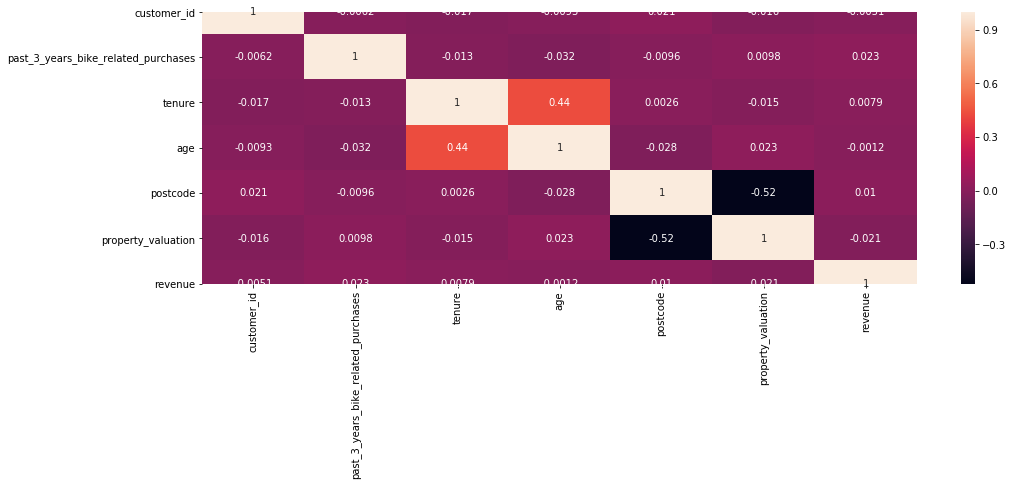

In [33]:
import seaborn as sn

corrMatrix = final_df.corr()
plt.figure(figsize = (16,5))
sn.heatmap(corrMatrix, annot=True)
plt.show()

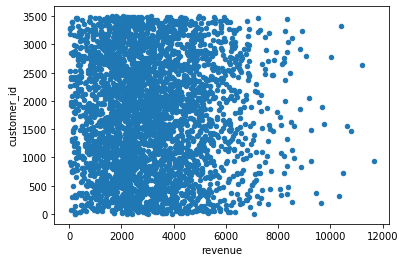

In [34]:
df_copy.plot.scatter(y = 'customer_id', x = 'revenue')

In [35]:
# removing outliers

median = df_copy['revenue'].median()
upper_bound = df_copy['revenue'].quantile(0.85)
lower_bound = df_copy['revenue'].quantile(0.15)
df_copy["revenue"] = np.where(df_copy["revenue"] > upper_bound, median,df_copy['revenue'])
df_copy['revenue'] = np.where(df_copy["revenue"] < lower_bound, median,df_copy['revenue'])
df_copy['revenue'].describe()

count    3412.000000
mean     2928.069226
std       810.970210
min      1323.220000
25%      2448.982500
50%      2847.585000
75%      3342.630000
max      4939.110000
Name: revenue, dtype: float64

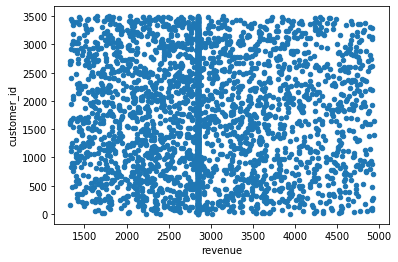

In [36]:
df_copy.plot.scatter(y = 'customer_id', x = 'revenue')

In [37]:
df_copy.drop(['deceased_indicator','address','country'],axis='columns',inplace = True)
df_copy.to_csv('kpmg_proc_data.csv',index = False)